<a href="https://colab.research.google.com/github/mugupta23/F1-data-analysis-final/blob/main/CCPX4199_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
circuits <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/circuits.csv')
constructor_results <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/constructor_results.csv')
constructor_standings <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/constructor_standings.csv')
constructors <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/constructors.csv')
driver_standings <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/driver_standings.csv')
drivers <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/drivers.csv')
lap_times <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/lap_times.csv')
pit_stops <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/pit_stops.csv')
qualifying <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/qualifying.csv')
races <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/races.csv')
results <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/results.csv')
seasons <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/seasons.csv')
status <- read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2021/2021-09-07/status.csv')

In [9]:
library(ggplot2)
con_data_1 <- merge(constructors, constructor_standings, by = "constructorId")
con_data_2 <- merge(con_data_1, races, by = "raceId")
con_data <- merge(con_data_2, results, by = c("raceId", "constructorId"))

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


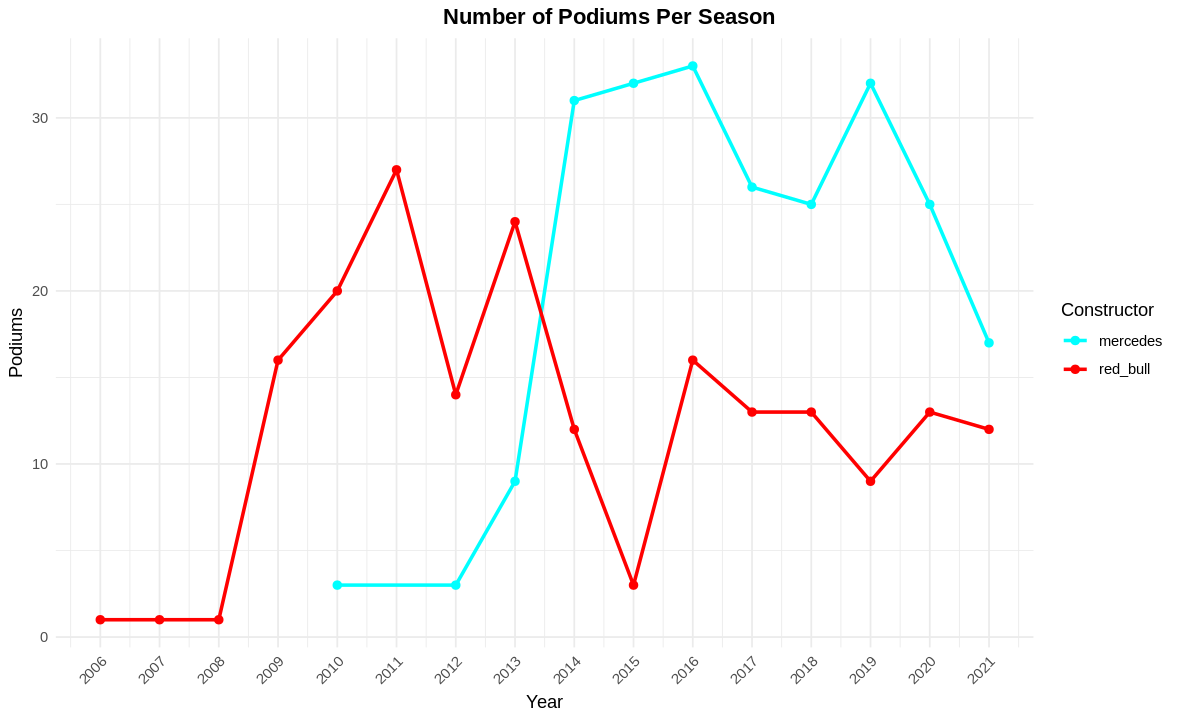

In [14]:
podium_data <- con_data %>%
  filter(constructorRef %in% c("mercedes", "red_bull"),
         position.y %in% 1:3) %>%
  group_by(year, constructorRef) %>%
  summarize(podiums = n())

ggplot(podium_data, aes(x = year, y = podiums, color = constructorRef)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  scale_x_continuous(breaks = seq(min(podium_data$year), max(podium_data$year), by = 1)) +
  scale_color_manual(values = c("red_bull" = "red",
                                "mercedes" = "cyan")) +
  labs(title = "Number of Podiums Per Season",
    x = "Year",
    y = "Podiums",
    color = "Constructor"
  )+
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.6),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

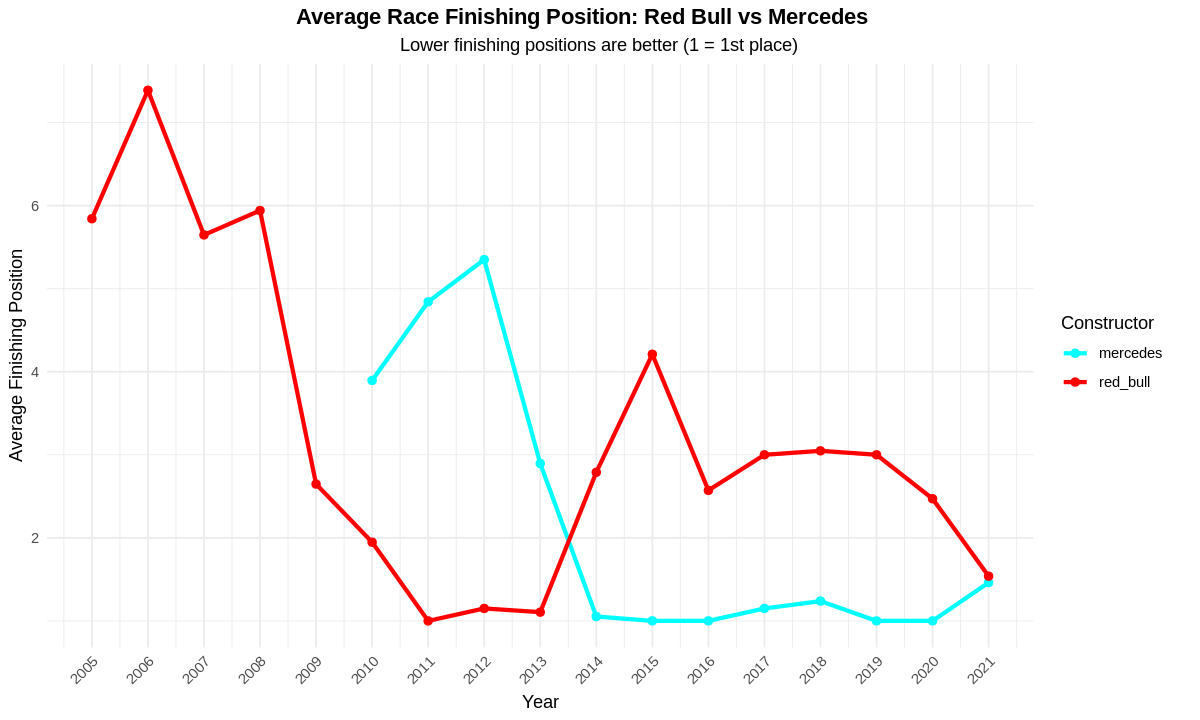

In [13]:
finish_data <- con_data %>%
  filter(constructorRef %in% c("red_bull", "mercedes")) %>%
  group_by(year, constructorRef) %>%
  summarize(avg_finish = mean(position.x, na.rm = TRUE), .groups = "drop") %>%

  group_by(year) %>%
  mutate(best_team = ifelse(avg_finish == min(avg_finish), constructorRef, NA)) %>%
  ungroup()

ggplot(finish_data, aes(x = year, y = avg_finish, color = constructorRef)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  scale_x_continuous(breaks = seq(min(finish_data$year), max(finish_data$year), by = 1)) +
  scale_color_manual(values = c("red_bull" = "red",
                                "mercedes" = "cyan")) +
  labs(
    title = "Average Race Finishing Position: Red Bull vs Mercedes",
    subtitle = "Lower finishing positions are better (1 = 1st place)",
    x = "Year",
    y = "Average Finishing Position",
    color = "Constructor"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.6),
    plot.subtitle = element_text(hjust = 0.6),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

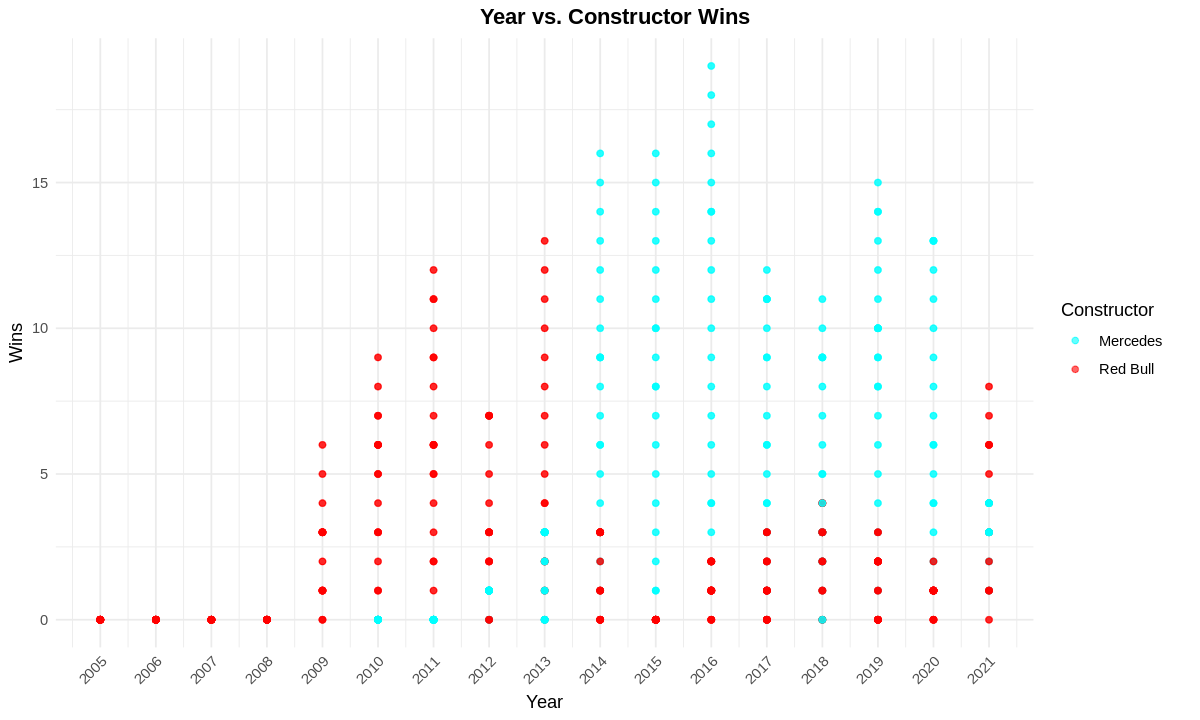

In [12]:
library(dplyr)
library(ggplot2)

con_data_filtered <- con_data %>%
  filter(name.x %in% c("Red Bull", "Mercedes"))

ggplot(con_data_filtered, aes(x = year, y = wins, color = name.x)) +
  geom_point(alpha = 0.6) +
  scale_color_manual(values = c("Red Bull" = "red",
                                "Mercedes" = "cyan")) +
  scale_x_continuous(breaks = seq(min(con_data$year), max(con_data$year), by = 1)) +

  labs(
    title = "Year vs. Constructor Wins",
    x = "Year",
    y = "Wins",
    color = "Constructor"
  ) +
  theme_minimal() +
    theme(
    plot.title = element_text(face = "bold", hjust = 0.6),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )